In [1]:
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv('wrangled_transactions.csv', index_col='CustomerID')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 766 entries, 12347.0 to 18260.0
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   2010 revenue               766 non-null    float64
 1   days_since_first_purchase  766 non-null    float64
 2   days_since_last_purchase   766 non-null    float64
 3   number_of_purchases        766 non-null    float64
 4   avg_order_cost             766 non-null    float64
 5   2011 revenue               766 non-null    float64
dtypes: float64(6)
memory usage: 41.9 KB


In [4]:
profile = pp.ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
df.head()

2010 revenue  days_since_first_purchase  days_since_last_purchase  \
CustomerID                                                                      
12347.0           711.79                       23.0                      23.0   
12348.0           892.80                       14.0                      14.0   
12370.0          1868.02                       16.0                      13.0   
12377.0          1001.52                       10.0                      10.0   
12383.0           600.72                        8.0                       8.0   

            number_of_purchases  avg_order_cost  2011 revenue  
CustomerID                                                     
12347.0                     1.0          711.79       3598.21  
12348.0                     1.0          892.80        904.44  
12370.0                     2.0          934.01       1677.67  
12377.0                     1.0         1001.52        626.60  
12383.0                     1.0          600.72       1249.84

In [6]:
df.describe()

2010 revenue  days_since_first_purchase  days_since_last_purchase  \
count    766.000000                 766.000000                766.000000   
mean     696.132402                  21.528721                 18.830287   
std     1563.130138                   5.575491                  5.891163   
min       12.450000                   7.000000                  7.000000   
25%      214.830000                  17.000000                 14.000000   
50%      348.080000                  22.000000                 18.000000   
75%      656.230000                  26.500000                 23.000000   
max    27834.610000                  29.000000                 29.000000   

       number_of_purchases  avg_order_cost   2011 revenue  
count           766.000000      766.000000     766.000000  
mean              1.411227      447.381247    5142.864661  
std               0.964374      682.930729   17637.619530  
min               1.000000       12.450000      10.000000  
25%               1.000000      190.425000     585.452500  
50%               1.000000      304.227500    1664.980000  
75%               2.000000      433.981250    3801.075000  
max              14.000000    13917.305000  271614.140000

In [7]:
df.corr()

2010 revenue  days_since_first_purchase  \
2010 revenue                   1.000000                   0.103284   
days_since_first_purchase      0.103284                   1.000000   
days_since_last_purchase      -0.172623                   0.602482   
number_of_purchases            0.380787                   0.304975   
avg_order_cost                 0.886935                  -0.002150   
2011 revenue                   0.649649                   0.040175   

                           days_since_last_purchase  number_of_purchases  \
2010 revenue                              -0.172623             0.380787   
days_since_first_purchase                  0.602482             0.304975   
days_since_last_purchase                   1.000000            -0.393803   
number_of_purchases                       -0.393803             1.000000   
avg_order_cost                            -0.071606             0.098482   
2011 revenue                              -0.104856             0.282602   

                           avg_order_cost  2011 revenue  
2010 revenue                     0.886935      0.649649  
days_since_first_purchase       -0.002150      0.040175  
days_since_last_purchase        -0.071606     -0.104856  
number_of_purchases              0.098482      0.282602  
avg_order_cost                   1.000000      0.623672  
2011 revenue                     0.623672      1.000000

c:\programdata\anaconda3\envs\ai_ocr\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='2010 revenue', ylabel='Density'>

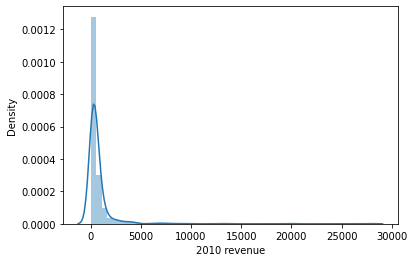

In [8]:
sns.distplot(df['2010 revenue'])

c:\programdata\anaconda3\envs\ai_ocr\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_order_cost', ylabel='Density'>

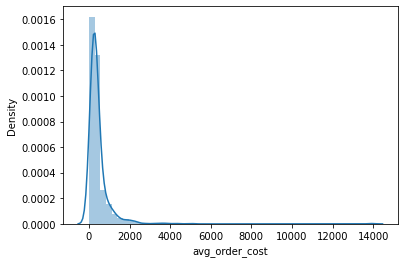

In [9]:
sns.distplot(df['avg_order_cost'])

### Nhận xét: dữ liệu df['2010 revenue'], df['avg_order_cost'] lệch phải

In [10]:
df['2010 revenue_log'] = np.log(df['2010 revenue'])
df['avg_order_cost_log'] = np.log(df['avg_order_cost'])

In [11]:
df.head()

2010 revenue  days_since_first_purchase  days_since_last_purchase  \
CustomerID                                                                      
12347.0           711.79                       23.0                      23.0   
12348.0           892.80                       14.0                      14.0   
12370.0          1868.02                       16.0                      13.0   
12377.0          1001.52                       10.0                      10.0   
12383.0           600.72                        8.0                       8.0   

            number_of_purchases  avg_order_cost  2011 revenue  \
CustomerID                                                      
12347.0                     1.0          711.79       3598.21   
12348.0                     1.0          892.80        904.44   
12370.0                     2.0          934.01       1677.67   
12377.0                     1.0         1001.52        626.60   
12383.0                     1.0          600.72       1249.84   

            2010 revenue_log  avg_order_cost_log  
CustomerID                                        
12347.0             6.567783            6.567783  
12348.0             6.794363            6.794363  
12370.0             7.532634            6.839487  
12377.0             6.909274            6.909274  
12383.0             6.398129            6.398129

In [12]:
X = df[['2010 revenue', 'days_since_last_purchase', 'number_of_purchases', 'avg_order_cost']]
y = df['2011 revenue']

In [13]:
def build_model(X, y, X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print("Dataset score:", model.score(X, y))
    print("Train Dataset score:", model.score(X_train, y_train))
    print("Test Dataset score:", model.score(X_test, y_test))
    print("")
    # The mean squared error
    print("Mean squared error: %.2f" % mean_squared_error(y, model.predict(X)))
    print("Mean absolute error: %.2f" % mean_absolute_error(y, model.predict(X)))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % model.score(X, y))
    return model

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)
model = build_model(X, y, X_train, X_test, y_train, y_test)

Dataset score: 0.421151147122406
Train Dataset score: 0.4863247538820461
Test Dataset score: -0.7745003295159671

Mean squared error: 179836475.48
Mean absolute error: 4198.73
Variance score: 0.42


In [15]:
# Visualization
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

c:\programdata\anaconda3\envs\ai_ocr\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\programdata\anaconda3\envs\ai_ocr\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\programdata\anaconda3\envs\ai_ocr\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

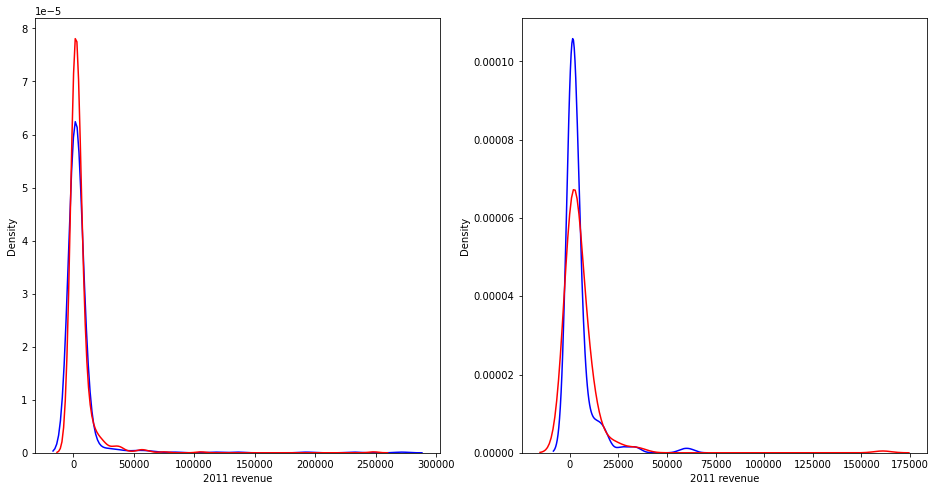

In [16]:
plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
ax1 = sns.distplot(y_train, hist=False, color="b", label='Train Actual')
sns.distplot(y_train_hat, hist=False, color="r", label='Train Predict', ax=ax1)
plt.subplot(1,2,2)
ax2 = sns.distplot(y_test, hist=False, color="b", label='Test Actual')
sns.distplot(y_test_hat, hist=False, color="r", label='Test Predict', ax=ax2)
plt.show()

## Áp dụng model sau khi dùng log_scaler

In [17]:
df.corr()

2010 revenue  days_since_first_purchase  \
2010 revenue                   1.000000                   0.103284   
days_since_first_purchase      0.103284                   1.000000   
days_since_last_purchase      -0.172623                   0.602482   
number_of_purchases            0.380787                   0.304975   
avg_order_cost                 0.886935                  -0.002150   
2011 revenue                   0.649649                   0.040175   
2010 revenue_log               0.641563                   0.144764   
avg_order_cost_log             0.556142                  -0.015862   

                           days_since_last_purchase  number_of_purchases  \
2010 revenue                              -0.172623             0.380787   
days_since_first_purchase                  0.602482             0.304975   
days_since_last_purchase                   1.000000            -0.393803   
number_of_purchases                       -0.393803             1.000000   
avg_order_cost                            -0.071606             0.098482   
2011 revenue                              -0.104856             0.282602   
2010 revenue_log                          -0.285668             0.486110   
avg_order_cost_log                        -0.105922             0.101538   

                           avg_order_cost  2011 revenue  2010 revenue_log  \
2010 revenue                     0.886935      0.649649          0.641563   
days_since_first_purchase       -0.002150      0.040175          0.144764   
days_since_last_purchase        -0.071606     -0.104856         -0.285668   
number_of_purchases              0.098482      0.282602          0.486110   
avg_order_cost                   1.000000      0.623672          0.639283   
2011 revenue                     0.623672      1.000000          0.416347   
2010 revenue_log                 0.639283      0.416347          1.000000   
avg_order_cost_log               0.688255      0.361033          0.899795   

                           avg_order_cost_log  
2010 revenue                         0.556142  
days_since_first_purchase           -0.015862  
days_since_last_purchase            -0.105922  
number_of_purchases                  0.101538  
avg_order_cost                       0.688255  
2011 revenue                         0.361033  
2010 revenue_log                     0.899795  
avg_order_cost_log                   1.000000

In [18]:
X1 = df[['2010 revenue_log','days_since_last_purchase','number_of_purchases','avg_order_cost_log']]
y1 = df['2011 revenue']

In [19]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state = 100)

In [20]:
model1 = build_model(X1, y1, X1_train, X1_test, y1_train, y1_test)

Dataset score: 0.18942716056652054
Train Dataset score: 0.18616032331997712
Test Dataset score: 0.2364583801493475

Mean squared error: 251828369.07
Mean absolute error: 6440.05
Variance score: 0.19


### Kết quả không tốt

## Áp dụng model với MinMaxScaler

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
min_max_scaler = MinMaxScaler()
X_after_min_max_scaler = min_max_scaler.fit_transform(X)
X2_train, X2_test, y2_train, y2_test = train_test_split(X_after_min_max_scaler, y, random_state = 100)

In [23]:
model2 = build_model(X_after_min_max_scaler, y, X2_train, X2_test, y2_train, y2_test)

Dataset score: 0.421151147122406
Train Dataset score: 0.4863247538820461
Test Dataset score: -0.7745003295159685

Mean squared error: 179836475.48
Mean absolute error: 4198.73
Variance score: 0.42


### Kết quả không tốt

## Áp dụng Polinormial Regression

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
pr1=PolynomialFeatures(degree=3)
pr1

PolynomialFeatures(degree=3)

In [26]:
X1_pr=pr1.fit_transform(X)
X.shape, X1_pr.shape

((766, 4), (766, 35))

In [27]:
X1_pr_train, X1_pr_test, y1_pr_train, y1_pr_test = train_test_split(X1_pr, y, random_state = 100)

In [28]:
model3 = build_model(X1_pr, y, X1_pr_train, X1_pr_test, y1_pr_train, y1_pr_test)

Dataset score: -20.21879482121976
Train Dataset score: 0.7293896252434628
Test Dataset score: -401.99378710919046

Mean squared error: 6592244686.18
Mean absolute error: 6604.85
Variance score: -20.22


### Kết quả không tốt. Nguyên nhân:
* Dữ liệu chưa đủ, chỉ có trong 2 năm 2010 và 2011
* Model tuyến tính không phù hợp